In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [2]:
face_full = plt.imread("face_full.jpg")
face_cropped = plt.imread("face_cropped.jpeg")
milk_full = plt.imread("milk_full.jpg")
milk_cropped = plt.imread("milk_cropped.jpeg")

In [3]:
def find_descriptors(img1, img2):
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    ldb = cv2.BRISK_create()

    keypoints1, descriptors1 = ldb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = ldb.detectAndCompute(gray2, None)

    return keypoints1, descriptors1, keypoints2, descriptors2

In [4]:
def match_descriptors_cv(img1, img2, kpts1, desc1, kpts2, desc2, threshold=0.7):
    bf = cv2.BFMatcher(cv2.NORM_L1)
    matches = bf.knnMatch(desc1, desc2, k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < n.distance * threshold:
            good_matches.append(m)
    good_matches = sorted(good_matches, key=lambda x: x.distance)
    img_matches = cv2.drawMatches(img1, kpts1, img2, kpts2, good_matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(img_matches) 
    plt.show() 
     

In [5]:
def custom_match(img1, img2, kpts1, desc1, kpts2, desc2):
    good_matches = []
    for i, k1 in enumerate(desc1):
        for j, k2 in enumerate(desc2):
            good_matches.append(cv2.DMatch(_queryIdx=i, _trainIdx=j, _distance=np.linalg.norm(k1 - k2, ord=2)))
    good_matches = sorted(good_matches, key=lambda x: x.distance)
    img_matches = cv2.drawMatches(img1, kpts1, img2, kpts2, good_matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(img_matches) 
    plt.show() 

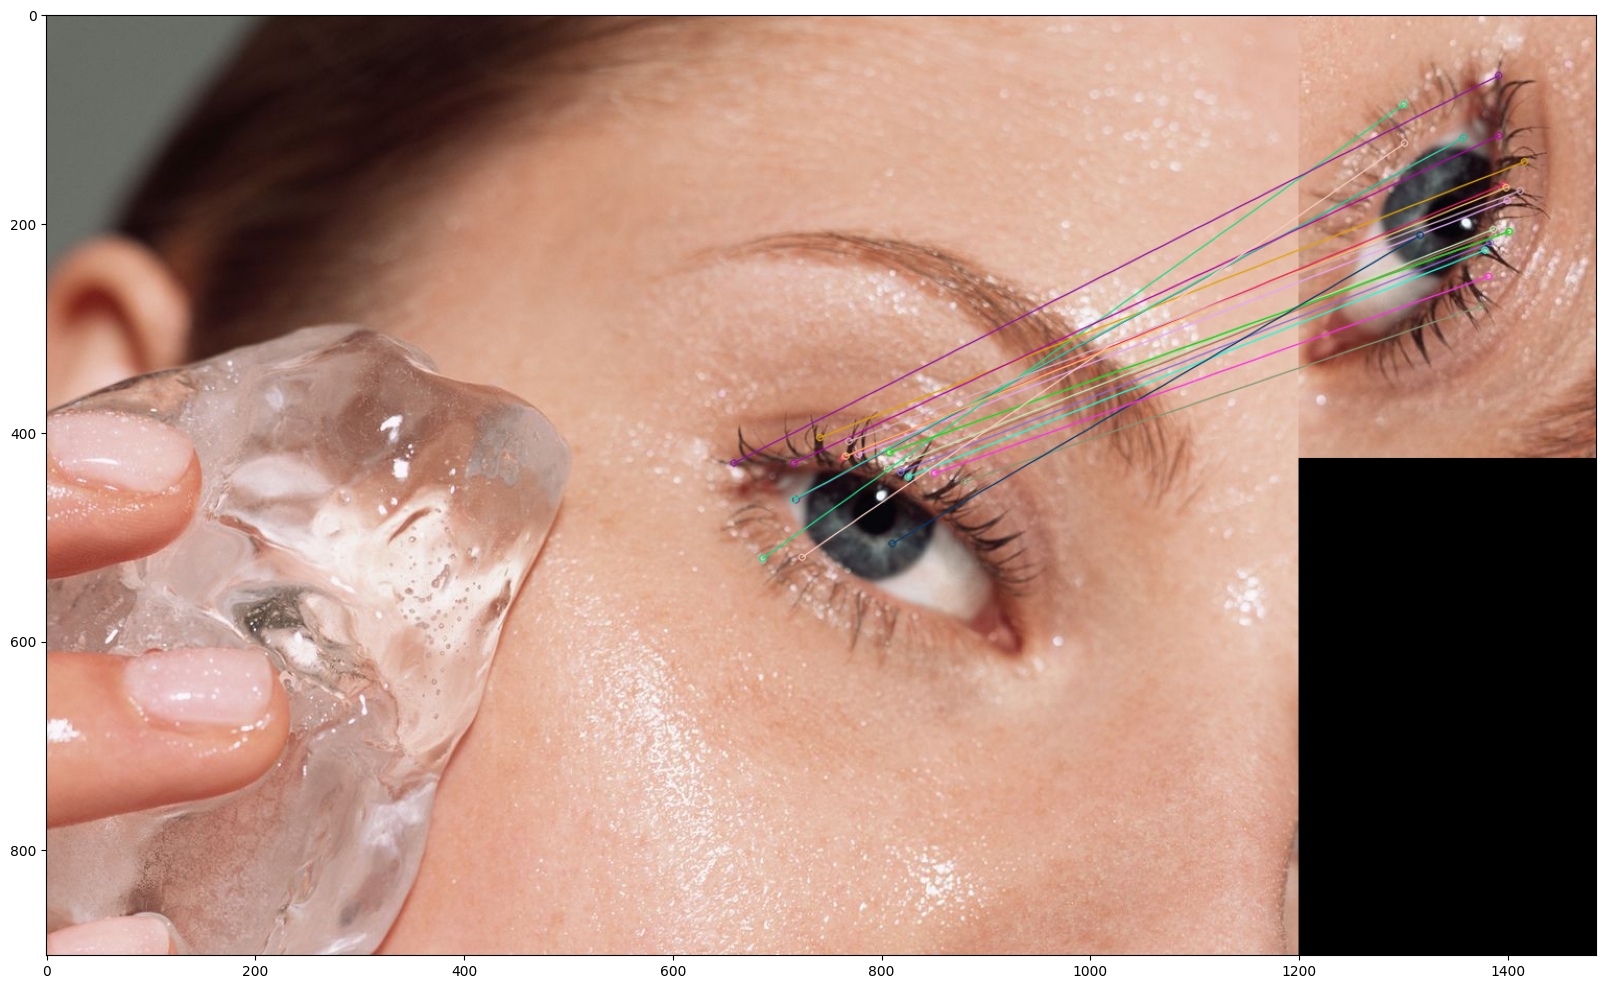

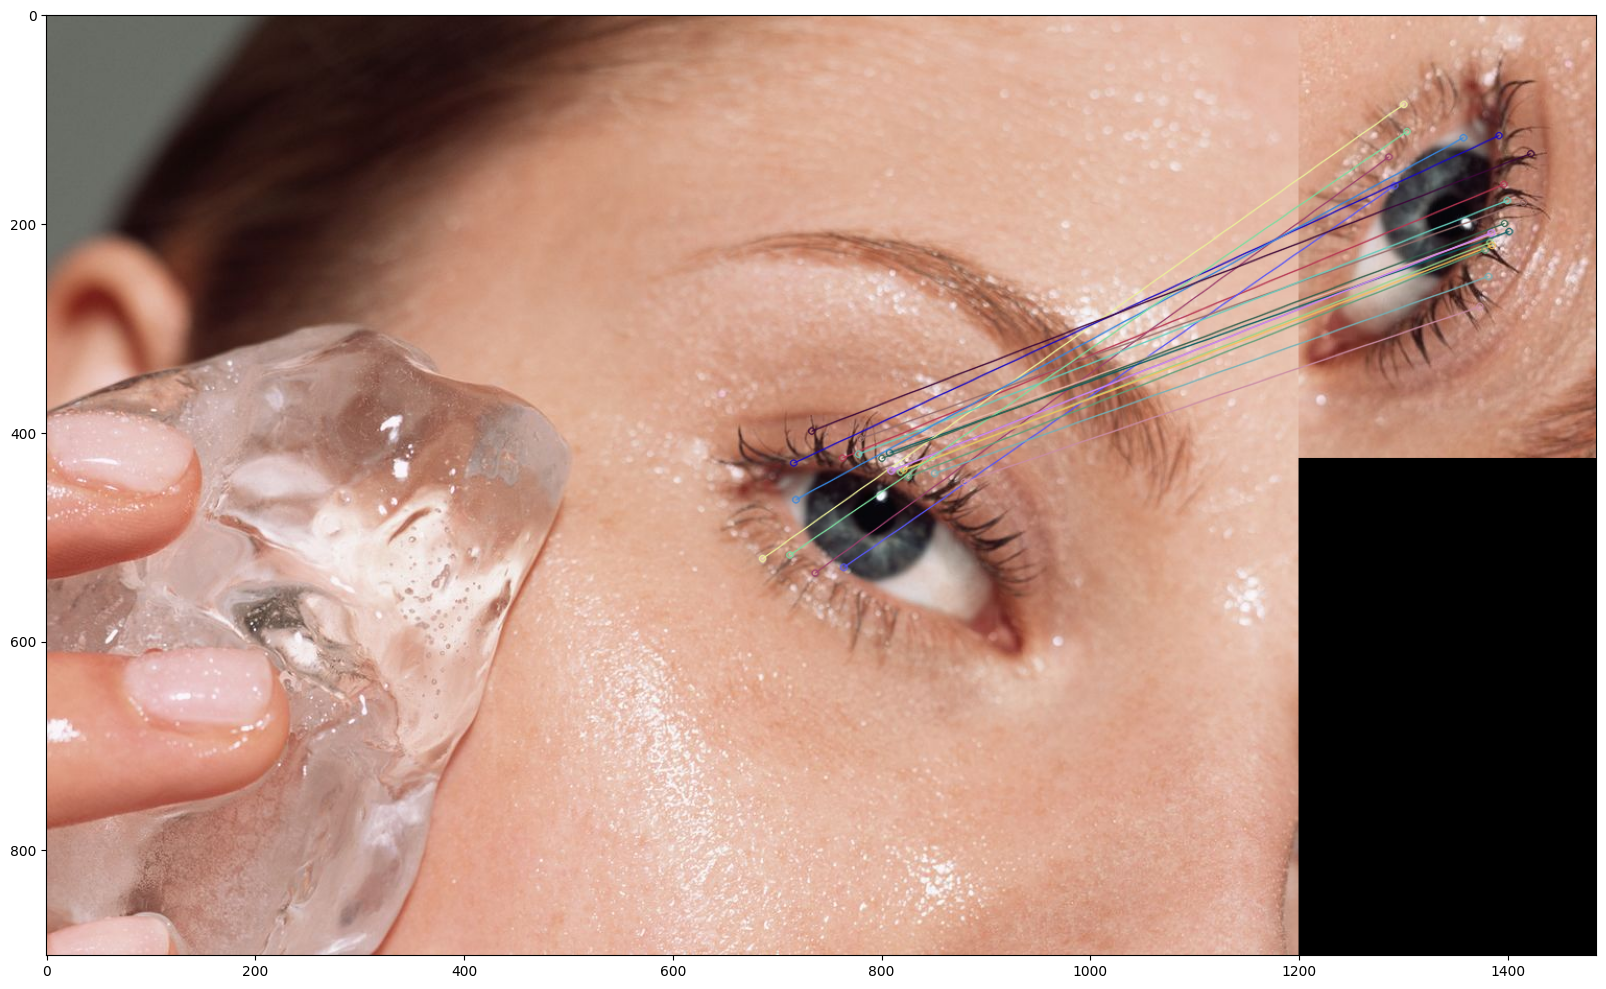

In [6]:
kpts1, desc1, kpts2, desc2 = find_descriptors(face_full, face_cropped)
match_descriptors_cv(face_full, face_cropped, kpts1, desc1, kpts2, desc2)
custom_match(face_full, face_cropped, kpts1, desc1, kpts2, desc2)

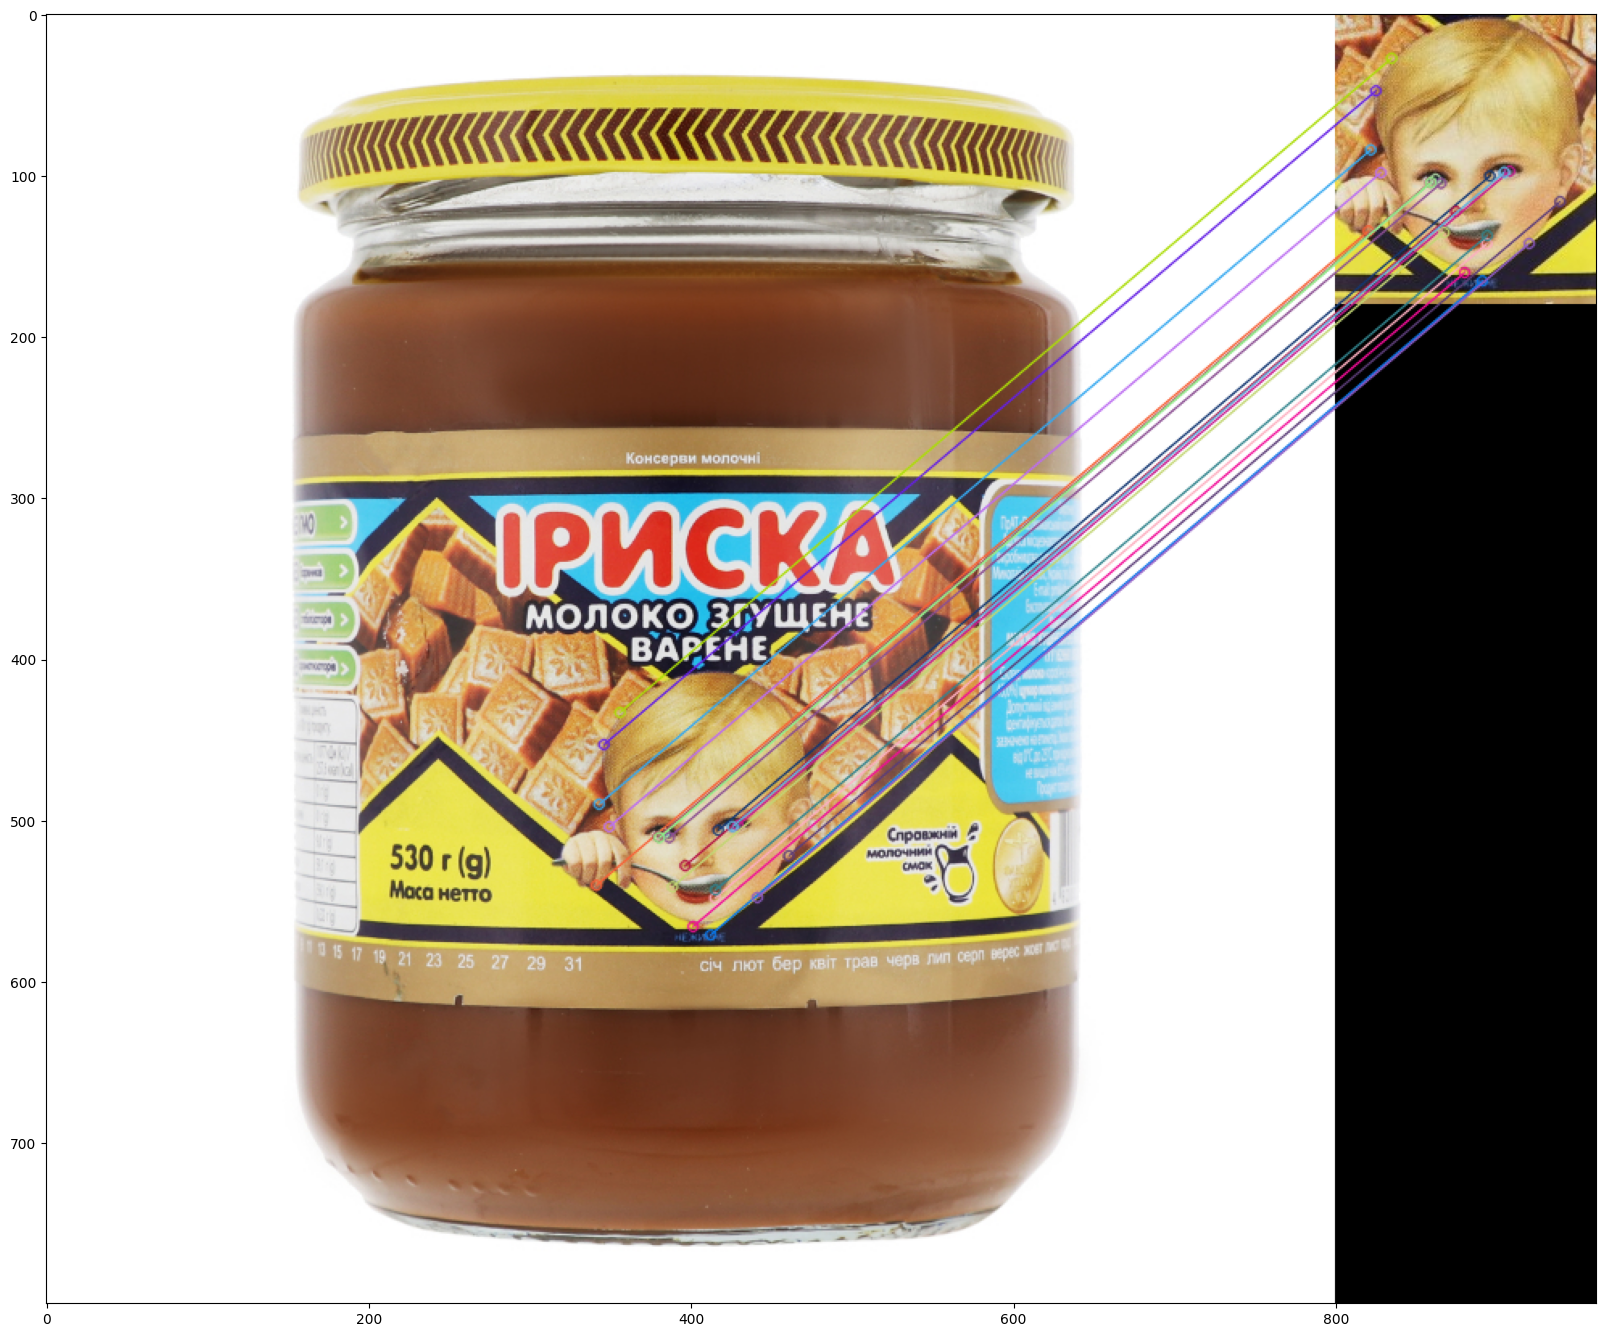

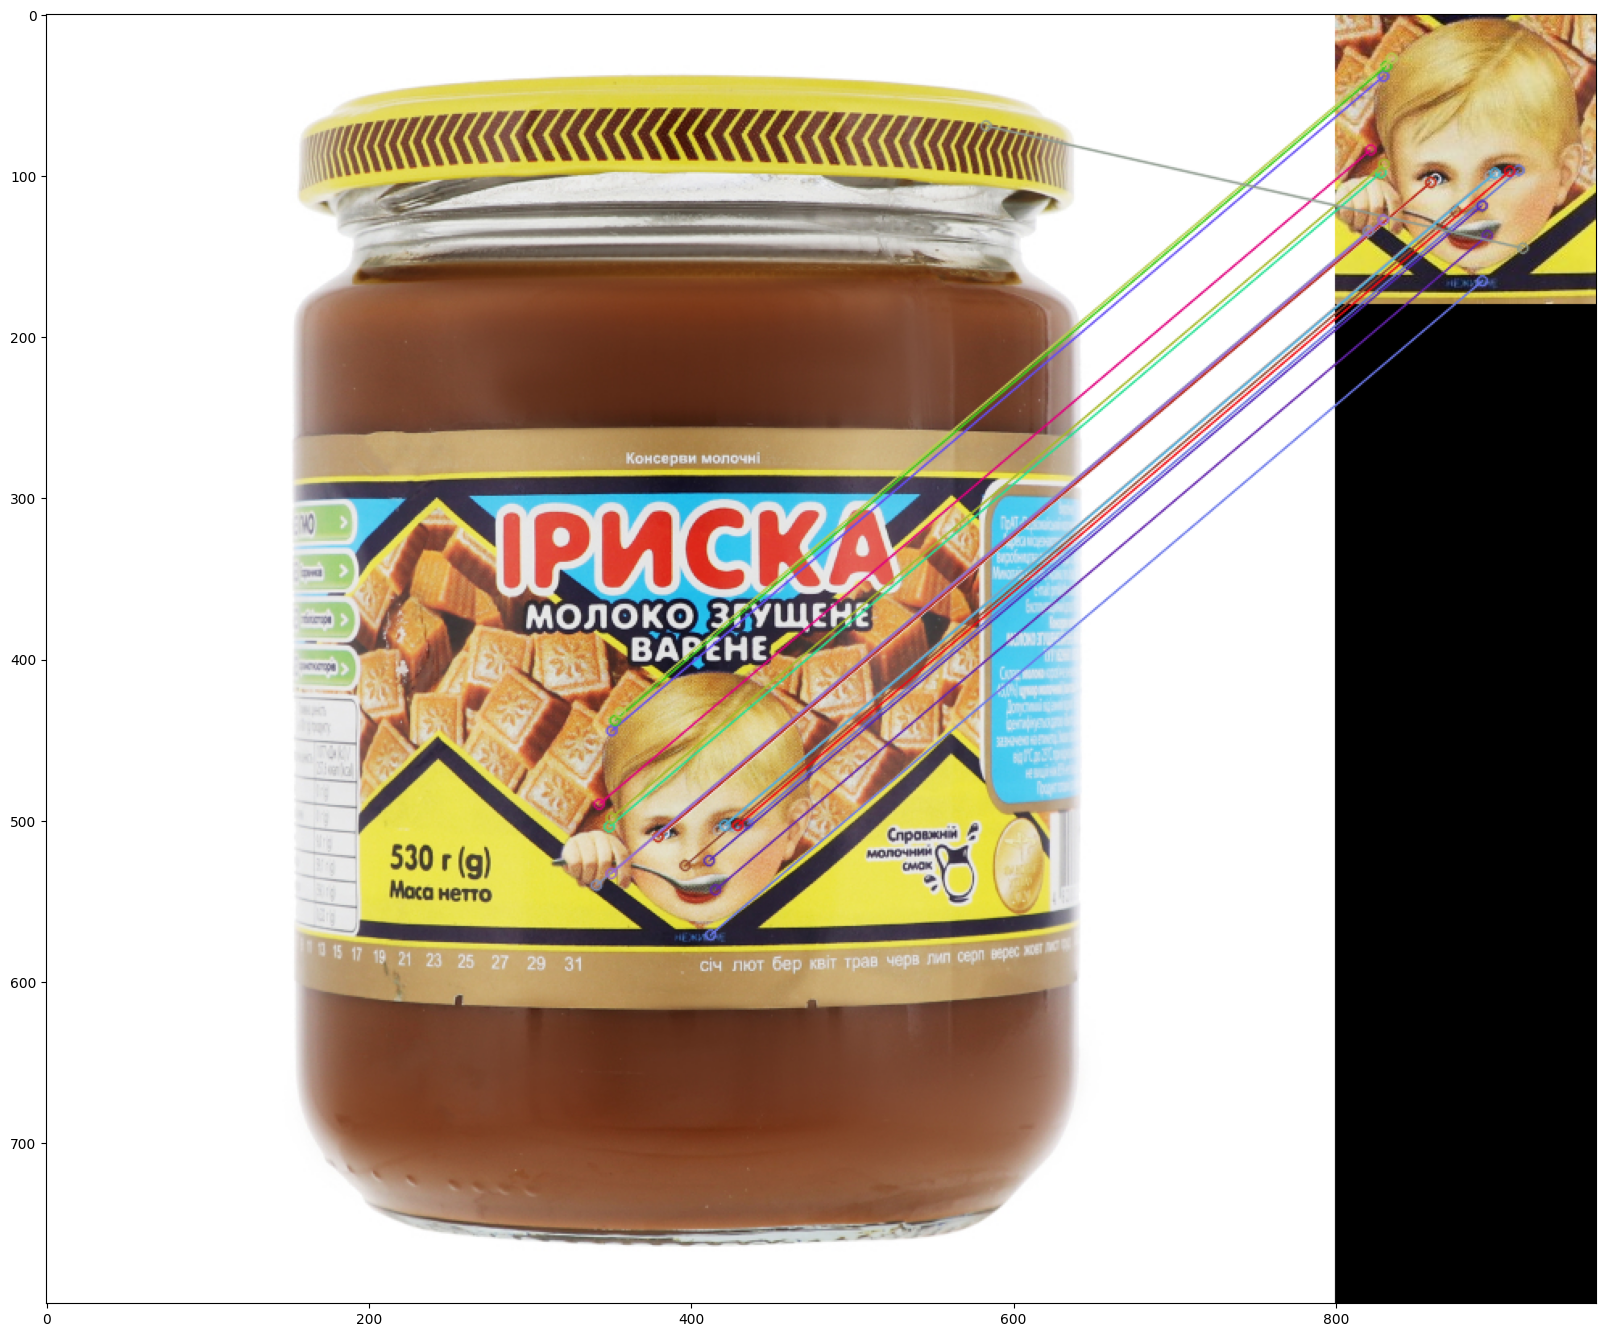

In [7]:
kpts1, desc1, kpts2, desc2 = find_descriptors(milk_full, milk_cropped)
match_descriptors_cv(milk_full, milk_cropped, kpts1, desc1, kpts2, desc2)
custom_match(milk_full, milk_cropped, kpts1, desc1, kpts2, desc2)